## Bagging
Bagging: Bootstrap Aggregation
Reduces variance of individual models in the ensemble


### <b>Bagging: Classification & Regression</b>
<li><b>Classification:</b></li>
        Aggregates predictions by majority voting.
        
        BaggingClassifier in scikit-learn.
<li><b>Regression:</b></li>
        Aggregates predictions through averaging.
        
        BaggingRegressor in scikit-learn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor

file_path = '/Users/joycemungai/datacamp/machine_learning_python/datasets/'

In [2]:
#load dataset
lipd = pd.read_csv(file_path + 'indian_liver_patient/indian_liver_patient_preprocessed.csv')

lipd.head()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [8]:
# X and y
X = lipd.loc[:, ~lipd.columns.isin(['Unnamed: 0','Liver_disease'])] 
## Drop unnamed column to prevent covergence warning in LogisticRegression
y = lipd['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,stratify = y, random_state=1)

In [9]:
#instantiate models

dt = DecisionTreeClassifier(random_state = 1)

bc = BaggingClassifier(
    base_estimator = dt,
    n_estimators = 50,
    random_state = 1
)


In [10]:
#fit model
bc.fit(X_train, y_train)

#predict test labels
y_pred = bc.predict(X_test)

#evaluate accuracy score
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.68


### Out of Bag Evaluation (OOB)

<li>On average, for each model, 63% of the training instances are sampled.</li>  
<li>The remaining 37% constitute the OOB instances.</li>  

In [11]:
# Instantiate oob_dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In [12]:
#OOB Score vs Test Set Score
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))


Test set accuracy: 0.690, OOB accuracy: 0.699


## Random Forest

In [14]:
#load dataset
bikes = pd.read_csv(file_path + 'bikes.csv')
bikes.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [21]:
X = bikes.drop('cnt', axis = 1)
y = bikes['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

#### Fit and Evaluate model

In [23]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49


#### Visualize importance of features

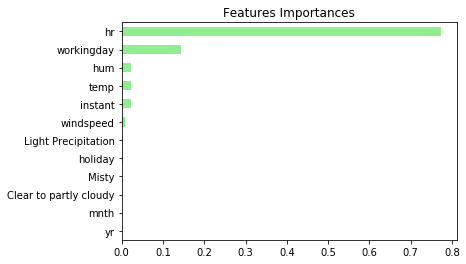

In [24]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()